# generate word clouds to see frequent words/topics to determine stop words

In [1]:
import nltk
import json
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
tokenizer = RegexpTokenizer(r'\w+')

In [22]:
stop_words = set(stopwords.words('english'))

# words used in the filter
filterWords = {"tesla", "elon", "musk", "elonmusk", "tsla", "roadster", "supercharger", "powerwall", "powerpack", "modely",
               "model3", "modelx", "teslamodely", "teslamodels", "teslamodel3", "teslamodelx", "spacex",
               "teslasuv", "teslascience"}

# bigrams used in the filter
filterBigrams = {("model", "y"), ("model", "s"), ("model", "3"), ("model", "x"), ("electric", "vehicle"),
                 ("electric", "car"), ("electric", "suv"), ("electric", "supercar")}

# stop words found using the word cloud (manual extraction)
cloud = {'year', 'amp', 'us', 'at_tesla'}

# add filter words to the stop words
for word in filterWords:
    stop_words.add(word)
    
# add filter bigrams to the stop words
for bi1, bi2 in filterBigrams:
    stop_words.add(bi1)
    stop_words.add(bi2)
    
# add cloud to the stop words
for word in cloud:
    stop_words.add(word)

counts = defaultdict(int)

handle = open('classify.json', encoding='utf8')

for line in handle:
    item = json.loads(line)
    if item['isRelevant'] == 1:  # get relevant tweets
        tokens = tokenizer.tokenize(item['text'].lower())
        for token in tokens:
            if token not in stop_words:
                counts[token] += 1
        
handle.close()

In [23]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wc.generate_from_frequencies(counts)

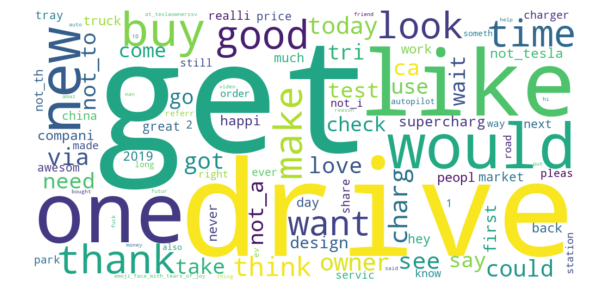

In [24]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# print the most common words
counts2 = []
for i, j in counts.items():
    counts2.append((i,j))
counts2.sort(key=lambda x:x[1], reverse=True)
for i in counts2:
    print(i)

('get', 240)
('drive', 180)
('like', 153)
('one', 141)
('would', 138)
('new', 120)
('buy', 108)
('thank', 102)
('good', 99)
('make', 96)
('time', 93)
('look', 90)
('want', 90)
('think', 87)
('charg', 81)
('today', 81)
('owner', 81)
('via', 78)
('see', 78)
('could', 75)
('got', 75)
('love', 72)
('ca', 72)
('need', 69)
('not_a', 69)
('test', 69)
('not_to', 69)
('use', 66)
('take', 66)
('wait', 66)
('tri', 66)
('say', 66)
('go', 63)
('come', 60)
('check', 60)
('design', 60)
('first', 60)
('supercharg', 60)
('happi', 57)
('compani', 57)
('not_tesla', 57)
('work', 54)
('day', 54)
('never', 54)
('truck', 54)
('peopl', 54)
('back', 54)
('2019', 54)
('great', 51)
('market', 51)
('much', 51)
('hey', 51)
('realli', 48)
('china', 48)
('next', 48)
('not_th', 48)
('share', 45)
('tray', 45)
('awesom', 45)
('2', 45)
('price', 45)
('charger', 42)
('park', 42)
('ever', 42)
('know', 42)
('still', 42)
('pleas', 42)
('servic', 42)
('made', 42)
('1', 42)
('not_i', 42)
('order', 39)
('right', 39)
('station'

('not_say', 6)
('not_than', 6)
('emoji_upsid', 6)
('down_fac', 6)
('shout', 6)
('improv', 6)
('not_ther', 6)
('wi', 6)
('hybrid', 6)
('non', 6)
('not_3', 6)
('not_off', 6)
('not_lin', 6)
('special', 6)
('cadillac', 6)
('pink', 6)
('passeng', 6)
('canada', 6)
('cannot', 6)
('winter', 6)
('articl', 6)
('porsch', 6)
('ladi', 6)
('emoji_skul', 6)
('wit', 6)
('backseat', 6)
('broken', 6)
('sue', 6)
('ground', 6)
('email', 6)
('machin', 6)
('minut', 6)
('not_up', 6)
('killer', 6)
('desert', 6)
('ford', 6)
('research', 6)
('wrap', 6)
('capabl', 6)
('rent', 6)
('rear', 6)
('not_bad', 6)
('simpl', 6)
('wors', 6)
('congrat', 6)
('100k', 6)
('dreamcar', 6)
('data', 6)
('dope', 6)
('asid', 6)
('seller', 6)
('at_teslaopinion', 6)
('traffic', 6)
('insan', 6)
('scottsdal', 6)
('broke', 6)
('instal', 6)
('law', 6)
('com', 6)
('becom', 6)
('america', 6)
('merced', 6)
('v', 6)
('not_ne', 6)
('not_replac', 6)
('gloria', 6)
('lil', 6)
('sold', 6)
('financi', 6)
('confus', 6)
('revenu', 6)
('annoy', 6)
('b

('aim', 3)
('pseudo', 3)
('surveil', 3)
('pain', 3)
('rep', 3)
('emoji_male_sign', 3)
('breweri', 3)
('downtown', 3)
('noho', 3)
('macro', 3)
('daddi', 3)
('consumpt', 3)
('breakdown', 3)
('ac', 3)
('fron', 3)
('11', 3)
('at_teslamidmo', 3)
('serious', 3)
('cute', 3)
('auction', 3)
('origin', 3)
('barrett', 3)
('jackson', 3)
('dumbest', 3)
('nail', 3)
('return', 3)
('simon', 3)
('derrick', 3)
('bni', 3)
('mellon', 3)
('rarri', 3)
('xanni', 3)
('queen', 3)
('anybodi', 3)
('joy', 3)
('lake', 3)
('taho', 3)
('traction', 3)
('vlog', 3)
('commerci', 3)
('sincer', 3)
('walker', 3)
('flocker', 3)
('beat', 3)
('simpli', 3)
('equip', 3)
('chain', 3)
('barrier', 3)
('cybereth', 3)
('not_they', 3)
('not_bmw', 3)
('impact2019', 3)
('emoji_face_with_open_mouth', 3)
('emoji_face_with_hand_over_mouth', 3)
('emoji_person_facepalm', 3)
('puerto', 3)
('rico', 3)
('fake', 3)
('bribe', 3)
('citizen', 3)
('filter', 3)
('co2', 3)
('cabin', 3)
('function', 3)
('cognit', 3)
('not_satisfi', 3)
('not_until', 3)

# look at common words in irrelevant tweets

In [35]:
irr = defaultdict(int)

handle = open('classify.json', encoding='utf8')

for line in handle:
    item = json.loads(line)
    if item['isRelevant'] == 0:  # irrelevant tweets
        tokens = tokenizer.tokenize(item['text'].lower())
        for token in tokens:
            if token not in stop_words:
                irr[token] += 1
        
handle.close()

In [37]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wc.generate_from_frequencies(irr)

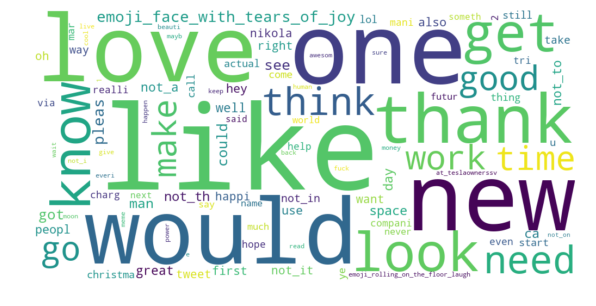

In [38]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# look at common words in negative tweets

In [26]:
neg = defaultdict(int)

handle = open('classify.json', encoding='utf8')

for line in handle:
    item = json.loads(line)
    if item['isRelevant'] == 1 and item['sentiment'] == 0:  # get relevant tweets
        var += 1
        tokens = tokenizer.tokenize(item['text'].lower())
        for token in tokens:
            if token not in stop_words:
                neg[token] += 1
handle.close()

In [27]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wc.generate_from_frequencies(neg)

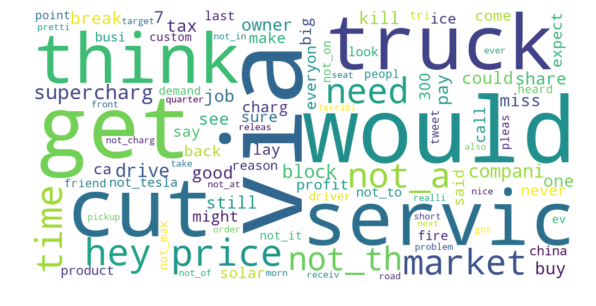

In [28]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# look at positive words in tweets

In [32]:
pos = defaultdict(int)

handle = open('classify.json', encoding='utf8')

for line in handle:
    item = json.loads(line)
    if item['isRelevant'] == 1 and item['sentiment'] == 2:  # get relevant tweets
        var += 1
        tokens = tokenizer.tokenize(item['text'].lower())
        for token in tokens:
            if token not in stop_words:
                pos[token] += 1
handle.close()

In [33]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wc.generate_from_frequencies(pos)

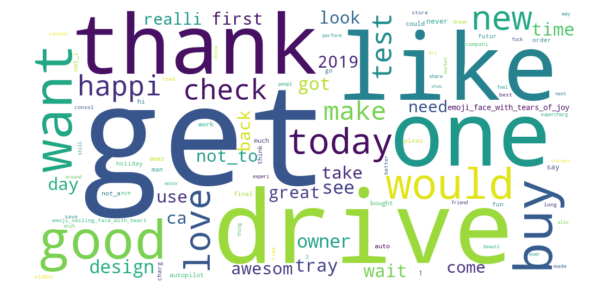

In [34]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# try to show tweets on a map

In [42]:
handle = open('classify.json', encoding='utf-8')

for line in handle:
    item = json.loads(line)
    print(json.dumps(item, indent=2))
    break
    
handle.close()

{
  "created_at": "Wed Dec 26 20:55:10 +0000 2018",
  "id": 1078031490657800200,
  "id_str": "1078031490657800203",
  "text": "destin charger charg normal car 7kw super network c",
  "display_text_range": [
    19,
    140
  ],
  "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
  "truncated": true,
  "in_reply_to_status_id": 1078031127120674800,
  "in_reply_to_status_id_str": "1078031127120674816",
  "in_reply_to_user_id": 244276771,
  "in_reply_to_user_id_str": "244276771",
  "in_reply_to_screen_name": "lileeny",
  "user": {
    "id": 15645692,
    "id_str": "15645692",
    "name": "Paul Kelly",
    "screen_name": "shortword",
    "location": " Carlow, Ireland",
    "url": "http://www.blacknight.com",
    "description": "Geek. Movie Lover. EV enthusiast, renewables curious, CTO / Co Founder @blacknight Work: http://www.blacknight.com",
    "translator_type": "none",
    "protected": false,
    "verified": false,
    "followers_count":

In [1]:
import pandas as pd
from mpl_toolkits.basemap import BaseMap
import matplotlib.pyplot as plt

ImportError: cannot import name 'artist' from 'matplotlib' (C:\Users\Edward\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py)